In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
driver_df = pd.read_csv("driver-data.csv")
driver_df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
driver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
driver_df.shape

(4000, 3)

In [5]:
#drop the id column

driver_df_without_id = driver_df.drop("id", axis=1)
driver_df_without_id

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


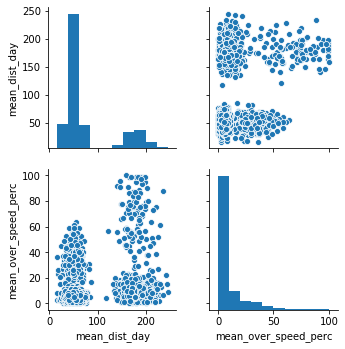

In [6]:
sns.pairplot(driver_df_without_id)

In [7]:
# Let's build the KMeans Model

from sklearn.cluster import KMeans

In [13]:
kmeans_model = KMeans(n_clusters = 2 , verbose = 1)

In [14]:
kmeans_model.fit(driver_df_without_id)

Initialization complete
Iteration 0, inertia 1449612.515500002
Iteration 1, inertia 1316427.5394861759
Converged at iteration 1: center shift 0.0070578138980175245 within tolerance 0.15230782662034964
Initialization complete
Iteration 0, inertia 1562529.2855000023
Iteration 1, inertia 1316420.850947721
Converged at iteration 1: center shift 1.9721522630525295e-31 within tolerance 0.15230782662034964
Initialization complete
Iteration 0, inertia 1492973.3684000028
Iteration 1, inertia 1316427.5394861756
Converged at iteration 1: center shift 0.007057813898017672 within tolerance 0.15230782662034964
Initialization complete
Iteration 0, inertia 2118365.2869000025
Iteration 1, inertia 1316420.850947721
Converged at iteration 1: center shift 0.0 within tolerance 0.15230782662034964
Initialization complete
Iteration 0, inertia 6558310.400599991
Iteration 1, inertia 1318160.554916843
Iteration 2, inertia 1316420.850947721
Converged at iteration 2: center shift 1.262177448353619e-29 within tole

KMeans(n_clusters=2, verbose=1)

In [15]:
print("Centroid co-ordinates of the 2 clusters are:")
print("===================================")
print(kmeans_model.cluster_centers_)

Centroid co-ordinates of the 2 clusters are:
[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [16]:
print("Cluster labels for the points in the dataset are:")
print(kmeans_model.labels_)

Cluster labels for the points in the dataset are:
[0 0 0 ... 1 1 1]


In [17]:
driver_df["Cluster Labels"] = kmeans_model.labels_ 

In [18]:
driver_df.head(20)

,id,mean_dist_day,mean_over_speed_perc,Cluster Labels
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
5,3423313857,41.91,10,0
6,3423312432,58.64,20,0
7,3423311434,52.02,8,0
8,3423311328,31.25,34,0
9,3423312488,44.31,19,0


In [19]:
print(len(kmeans_model.labels_))

4000


In [20]:
driver_df["Cluster Labels"].unique()

array([0, 1], dtype=int64)

In [21]:
driver_df["Cluster Labels"].value_counts()

0    3200
1     800
Name: Cluster Labels, dtype: int64

**Visualize the clusters**

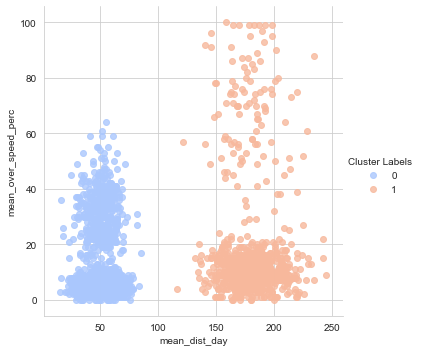

In [22]:
sns.set_style("whitegrid")

sns.lmplot("mean_dist_day", "mean_over_speed_perc", data = driver_df, hue = "Cluster Labels",
          palette = "coolwarm", fit_reg = False)

**Elbow method using WCSS to identify the ideal number of clusters present in a dataset**

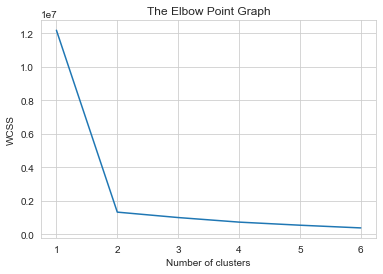

In [24]:
wcss = []
for i in range(1,7):
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(driver_df_without_id)
    wcss.append(kmeans1.inertia_)
    

#Plotting the elbow graph
plt.plot(range(1,7), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

As the WCSS value decreases, the K-value increases(i.e) the cluster performance increases.

# End of discussion